In [0]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# this is the file path of ladder_net.py file
import os
os.chdir('/content/drive/My Drive/final_code/noisystudent-master') # root dictionary, the parent folder root of train and test folder
os.getcwd()

'/content/drive/My Drive/final_code/noisystudent-master'

In [0]:
ls

CONTRIBUTING.md          local_scripts/           proc_svhn.py
data_input.py            main.ipynb               __pycache__/
efficientnet_builder.py  main.py                  randaugment.py
efficientnet_model.py    mnist_example.py         README.md
ladder_net_dropout.py    noisystudent_svhn.ipynb  task_info.py
ladder_net.py            pic_500.xlsx             utils.py
LICENSE                  preprocessing.py


In [0]:
#Select TensorFlow 1.x
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
# Show the version of tensorflow
import tensorflow as tf
tf.__version__

'1.15.2'

In [0]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 9.1MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
# Find the best ratio of mnist dataset
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10 # number of classes
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# size_list is the list of the size of unlabeled data
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

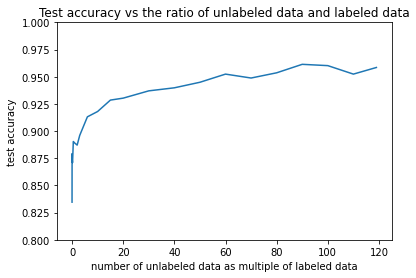

In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.show()  

In [0]:
# print accuracy list
print(acc_list)

[0.7407, 0.8084, 0.8477, 0.8715, 0.8735, 0.8879, 0.8754, 0.8795, 0.883, 0.8894, 0.8327, 0.8576, 0.8726, 0.8753, 0.8757, 0.88, 0.8916, 0.8808, 0.8895, 0.8828, 0.8731, 0.8839, 0.8872, 0.8946, 0.8998, 0.8991, 0.8962, 0.8964, 0.8971, 0.8996, 0.8706, 0.8748, 0.8877, 0.8974, 0.8961, 0.9005, 0.8963, 0.9052, 0.9098, 0.9076, 0.8912, 0.9031, 0.9099, 0.9173, 0.9132, 0.9242, 0.9195, 0.9252, 0.9274, 0.9324, 0.8968, 0.9141, 0.9158, 0.9281, 0.9289, 0.926, 0.9338, 0.9396, 0.9418, 0.9391, 0.9084, 0.9129, 0.9146, 0.9311, 0.9236, 0.9374, 0.9318, 0.9471, 0.9431, 0.948, 0.9072, 0.9225, 0.9279, 0.9286, 0.9445, 0.9425, 0.9453, 0.948, 0.9502, 0.9448, 0.9177, 0.9251, 0.9358, 0.938, 0.9391, 0.9457, 0.949, 0.9469, 0.9529, 0.9542, 0.9189, 0.9318, 0.9391, 0.9414, 0.9456, 0.9515, 0.9487, 0.9517, 0.951, 0.9552, 0.9058, 0.9233, 0.9297, 0.9322, 0.9431, 0.9444, 0.9522, 0.9538, 0.951, 0.9529, 0.9172, 0.9269, 0.9285, 0.9406, 0.9465, 0.9462, 0.9538, 0.9513, 0.9504, 0.9546, 0.9147, 0.9366, 0.9375, 0.9469, 0.9468, 0.9538, 0

In [0]:
# Delete all gaussian noise in the model above, find the result.
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])

size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=0)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

In [0]:
# plot test accuracy vs the ratio of unlabeled data and labeled data
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.7, 1)
plt.show()  

In [0]:
#Change the norm of the gaussian noise
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
# noise_list is the list of the norm of noise
noise_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
acc_list_noise=[]
labeled_size=500
unlabel_size=40000
random.seed(0)
idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
random.seed(1)
idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
x_train_unlabeled = x_train[idxs_unlabel]
y_train_unlabeled = y_train[idxs_unlabel]
x_train_labeled   = x_train[idxs_label]
y_train_labeled   = y_train[idxs_label]
if unlabel_size>=labeled_size:
  n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
  x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
  y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
else:
  n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
  x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
  y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
for noise in noise_list:  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=noise)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list_noise.append(acc)  

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2690 - accuracy: 0.9743
Test accuracy : 0.888700
Epoch 1/1
   96/40000 [..............................] - ETA: 1:17 - loss: 0.3493 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 0.3970 - accuracy: 0.9934
Test accuracy : 0.878400
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3986 - accuracy: 0.9933
Test accuracy : 0.882200
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3934 - accuracy: 0.9952
Test accuracy : 0.883500
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3905 - accuracy: 0.9959
Test accuracy : 0.889500
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3864 - accuracy: 0.9979
Test accuracy : 0.886400
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3850 - accuracy: 0.9975
Test accuracy : 0.876700
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3872 - accuracy: 0.9973
Test accuracy : 0.887100
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3824 - accuracy: 0.9989
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 1.2564 - accuracy: 0.9931
Test accuracy : 0.886800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1567 - accuracy: 0.9953
Test accuracy : 0.892800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1197 - accuracy: 0.9948
Test accuracy : 0.905300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0967 - accuracy: 0.9968
Test accuracy : 0.908900
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0817 - accuracy: 0.9983
Test accuracy : 0.898800
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0736 - accuracy: 0.9969
Test accuracy : 0.905000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0552 - accuracy: 0.9993
Test accuracy : 0.909400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0557 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 2.6982 - accuracy: 0.9920
Test accuracy : 0.908800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.5334 - accuracy: 0.9955
Test accuracy : 0.911200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4697 - accuracy: 0.9957
Test accuracy : 0.906200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4279 - accuracy: 0.9973
Test accuracy : 0.910400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3991 - accuracy: 0.9974
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3779 - accuracy: 0.9979
Test accuracy : 0.914000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3553 - accuracy: 0.9983
Test accuracy : 0.916700
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3256 - accuracy: 0.9991
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 4.5220 - accuracy: 0.9920
Test accuracy : 0.901200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.3170 - accuracy: 0.9943
Test accuracy : 0.909300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.2375 - accuracy: 0.9962
Test accuracy : 0.916500
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1722 - accuracy: 0.9959
Test accuracy : 0.906300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1277 - accuracy: 0.9969
Test accuracy : 0.912000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0808 - accuracy: 0.9984
Test accuracy : 0.922300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0453 - accuracy: 0.9985
Test accuracy : 0.920600
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0241 - accuracy: 0.9980
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 6.6448 - accuracy: 0.9897
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.4035 - accuracy: 0.9920
Test accuracy : 0.911900
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.2657 - accuracy: 0.9947
Test accuracy : 0.929800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.1699 - accuracy: 0.9952
Test accuracy : 0.930800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0957 - accuracy: 0.9962
Test accuracy : 0.937100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0097 - accuracy: 0.9974
Test accuracy : 0.928000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9611 - accuracy: 0.9971
Test accuracy : 0.938700
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9197 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 8.9354 - accuracy: 0.9853
Test accuracy : 0.924700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.6024 - accuracy: 0.9891
Test accuracy : 0.933200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.3702 - accuracy: 0.9909
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.2660 - accuracy: 0.9919
Test accuracy : 0.938200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.1350 - accuracy: 0.9926
Test accuracy : 0.944000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.0065 - accuracy: 0.9954
Test accuracy : 0.947400
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.9264 - accuracy: 0.9951
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.8583 - accuracy: 0.9952
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 11.2060 - accuracy: 0.9793
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.7748 - accuracy: 0.9835
Test accuracy : 0.941800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.4558 - accuracy: 0.9861
Test accuracy : 0.946400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.2566 - accuracy: 0.9877
Test accuracy : 0.948200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.1243 - accuracy: 0.9884
Test accuracy : 0.950400
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 9.9865 - accuracy: 0.9909
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.8606 - accuracy: 0.9917
Test accuracy : 0.954700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.7527 - accuracy: 0.992

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 13.4188 - accuracy: 0.9670
Test accuracy : 0.938100
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.8550 - accuracy: 0.9745
Test accuracy : 0.945800
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 12.5271 - accuracy: 0.9765
Test accuracy : 0.949200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.2724 - accuracy: 0.9802
Test accuracy : 0.952700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.1051 - accuracy: 0.9819
Test accuracy : 0.954800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.9767 - accuracy: 0.9818
Test accuracy : 0.950800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.8127 - accuracy: 0.9843
Test accuracy : 0.955400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.7469 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 84s 2ms/step - loss: 15.5656 - accuracy: 0.9524
Test accuracy : 0.934300
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 14.9273 - accuracy: 0.9597
Test accuracy : 0.942900
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.5543 - accuracy: 0.9627
Test accuracy : 0.947200
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.2611 - accuracy: 0.9650
Test accuracy : 0.947600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.0790 - accuracy: 0.9678
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.8581 - accuracy: 0.9691
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.7603 - accuracy: 0.9714
Test accuracy : 0.953500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.5788 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 86s 2ms/step - loss: 17.9176 - accuracy: 0.9276
Test accuracy : 0.940200
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 17.1415 - accuracy: 0.9395
Test accuracy : 0.941100
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.6959 - accuracy: 0.9436
Test accuracy : 0.947500
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.3615 - accuracy: 0.9473
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 16.1402 - accuracy: 0.9509
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.9270 - accuracy: 0.9520
Test accuracy : 0.956500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.7470 - accuracy: 0.9561
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.6386 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 87s 2ms/step - loss: 20.0090 - accuracy: 0.9053
Test accuracy : 0.937200
Epoch 1/1
40000/40000 [==============================] - 88s 2ms/step - loss: 19.1748 - accuracy: 0.9179
Test accuracy : 0.940100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.6983 - accuracy: 0.9216
Test accuracy : 0.944500
Epoch 1/1
40000/40000 [==============================] - 89s 2ms/step - loss: 18.3761 - accuracy: 0.9245
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.0791 - accuracy: 0.9289
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.8401 - accuracy: 0.9327
Test accuracy : 0.950700
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.7737 - accuracy: 0.9359
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.5696 - accuracy: 0.

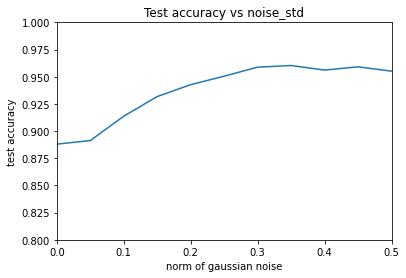

In [0]:
import matplotlib.pyplot as plt
noise_list_plot=np.array(noise_list)
plt.plot(noise_list_plot, acc_list_noise)  
plt.title("Test accuracy vs noise_std")
plt.xlabel("norm of gaussian noise")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.xlim(0, 0.5)
plt.show() 

In [0]:
print(acc_list_noise)

NameError: ignored

In [0]:
# Find the best ratio of fashion_mnist dataset, try to find out whether the different dataset has the same best ratio
from __future__ import print_function

from keras.datasets import fashion_mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of fashion_mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

4423680/4422102 [==============================] - 1s 0us/step


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
500/500 [==============================] - 12s 24ms/step - loss: 165.5869 - accuracy: 0.4280
Test accuracy : 0.542800
Epoch 1/1
 64/500 [==>...........................] - ETA: 1s - loss: 36.6695 - accuracy: 0.4844

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 26.7833 - accuracy: 0.4760
Test accuracy : 0.591200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.7109 - accuracy: 0.5020
Test accuracy : 0.593000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.9613 - accuracy: 0.5320
Test accuracy : 0.619900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 11.0497 - accuracy: 0.5600
Test accuracy : 0.641500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 7.1200 - accuracy: 0.5740
Test accuracy : 0.650600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 4.7716 - accuracy: 0.5460
Test accuracy : 0.639300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 3.2520 - accuracy: 0.5720
Test accuracy : 0.636000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 2.4700 - accuracy: 0.5320
Test accuracy : 0.655700
Epoch 1/1
500/

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 22.1532 - accuracy: 0.6600
Test accuracy : 0.695200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.7844 - accuracy: 0.7080
Test accuracy : 0.692500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 10.3628 - accuracy: 0.7160
Test accuracy : 0.714400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 7.0597 - accuracy: 0.7360
Test accuracy : 0.720600
Epoch 1/1
500/500 [==============================] - 1s 2ms/step - loss: 6.8535 - accuracy: 0.7700
Test accuracy : 0.729800
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.2883 - accuracy: 0.7180
Test accuracy : 0.725900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.3675 - accuracy: 0.7580
Test accuracy : 0.732300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 5.7372 - accuracy: 0.7840
Test accuracy : 0.754000
Epoch 1/1
500/5

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 29.8437 - accuracy: 0.6160
Test accuracy : 0.661500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.8357 - accuracy: 0.6940
Test accuracy : 0.674500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.6843 - accuracy: 0.7040
Test accuracy : 0.686200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 17.2976 - accuracy: 0.7140
Test accuracy : 0.680900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.1295 - accuracy: 0.7020
Test accuracy : 0.695600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 13.3499 - accuracy: 0.7080
Test accuracy : 0.692600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 12.1985 - accuracy: 0.7260
Test accuracy : 0.700400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 11.0985 - accuracy: 0.7560
Test accuracy : 0.708900
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.5128 - accuracy: 0.6660
Test accuracy : 0.691400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 26.7611 - accuracy: 0.7160
Test accuracy : 0.725100
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 22.3195 - accuracy: 0.7180
Test accuracy : 0.721500
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.6936 - accuracy: 0.6980
Test accuracy : 0.722600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 18.7207 - accuracy: 0.7740
Test accuracy : 0.717200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 17.7652 - accuracy: 0.7460
Test accuracy : 0.741400
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 16.7399 - accuracy: 0.7700
Test accuracy : 0.732200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 15.9396 - accuracy: 0.7860
Test accuracy : 0.744200
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.0119 - accuracy: 0.6680
Test accuracy : 0.704200
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 26.8897 - accuracy: 0.7200
Test accuracy : 0.694900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.1924 - accuracy: 0.7380
Test accuracy : 0.725800
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 21.5141 - accuracy: 0.7480
Test accuracy : 0.733900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 21.0141 - accuracy: 0.7700
Test accuracy : 0.729600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.5937 - accuracy: 0.7780
Test accuracy : 0.745700
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 18.9071 - accuracy: 0.7980
Test accuracy : 0.737600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 19.0800 - accuracy: 0.7920
Test accuracy : 0.739100
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


500/500 [==============================] - 1s 3ms/step - loss: 32.8450 - accuracy: 0.6240
Test accuracy : 0.690100
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 27.2171 - accuracy: 0.6300
Test accuracy : 0.698300
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 23.7510 - accuracy: 0.6640
Test accuracy : 0.707700
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 22.2932 - accuracy: 0.6920
Test accuracy : 0.708600
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.9127 - accuracy: 0.7020
Test accuracy : 0.733900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.8835 - accuracy: 0.7100
Test accuracy : 0.719900
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.3827 - accuracy: 0.7460
Test accuracy : 0.740000
Epoch 1/1
500/500 [==============================] - 1s 3ms/step - loss: 20.2486 - accuracy: 0.7200
Test accuracy : 0.741400
Epoch 1/1


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1000/1000 [==============================] - 3s 3ms/step - loss: 25.1906 - accuracy: 0.6960
Test accuracy : 0.718500
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 21.6980 - accuracy: 0.7220
Test accuracy : 0.729400
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 20.5665 - accuracy: 0.7610
Test accuracy : 0.729400
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 20.0132 - accuracy: 0.7640
Test accuracy : 0.747100
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 19.5088 - accuracy: 0.8020
Test accuracy : 0.740500
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.8427 - accuracy: 0.7890
Test accuracy : 0.758000
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.7084 - accuracy: 0.8190
Test accuracy : 0.768100
Epoch 1/1
1000/1000 [==============================] - 3s 3ms/step - loss: 18.0314 - accuracy: 0.8220
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1500/1500 [==============================] - 4s 3ms/step - loss: 22.8303 - accuracy: 0.7220
Test accuracy : 0.727400
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 21.0166 - accuracy: 0.7647
Test accuracy : 0.733800
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 20.0312 - accuracy: 0.7880
Test accuracy : 0.740900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 19.0119 - accuracy: 0.8173
Test accuracy : 0.771900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 18.4271 - accuracy: 0.8387
Test accuracy : 0.754900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 17.6580 - accuracy: 0.8460
Test accuracy : 0.773400
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 17.3237 - accuracy: 0.8500
Test accuracy : 0.772900
Epoch 1/1
1500/1500 [==============================] - 4s 3ms/step - loss: 16.8449 - accuracy: 0.8687
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


3000/3000 [==============================] - 8s 3ms/step - loss: 20.6817 - accuracy: 0.7663
Test accuracy : 0.753000
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 19.3318 - accuracy: 0.8060
Test accuracy : 0.757500
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 18.0164 - accuracy: 0.8287
Test accuracy : 0.763800
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 17.2737 - accuracy: 0.8607
Test accuracy : 0.773600
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 16.7405 - accuracy: 0.8727
Test accuracy : 0.773600
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 16.3810 - accuracy: 0.8873
Test accuracy : 0.775300
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 15.9769 - accuracy: 0.8857
Test accuracy : 0.785800
Epoch 1/1
3000/3000 [==============================] - 8s 3ms/step - loss: 15.5345 - accuracy: 0.9083
Test accuracy : 0.7

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


5000/5000 [==============================] - 14s 3ms/step - loss: 19.0310 - accuracy: 0.8106
Test accuracy : 0.758900
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 17.4929 - accuracy: 0.8576
Test accuracy : 0.758400
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 16.5486 - accuracy: 0.8858
Test accuracy : 0.764200
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.8829 - accuracy: 0.8832
Test accuracy : 0.758800
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.5504 - accuracy: 0.9042
Test accuracy : 0.755700
Epoch 1/1
5000/5000 [==============================] - 14s 3ms/step - loss: 15.2658 - accuracy: 0.9122
Test accuracy : 0.759500
Epoch 1/1
5000/5000 [==============================] - 13s 3ms/step - loss: 14.8963 - accuracy: 0.9274
Test accuracy : 0.768100
Epoch 1/1
5000/5000 [==============================] - 13s 3ms/step - loss: 15.0012 - accuracy: 0.9232
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


7500/7500 [==============================] - 21s 3ms/step - loss: 17.7962 - accuracy: 0.8344
Test accuracy : 0.781900
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 16.4546 - accuracy: 0.8796
Test accuracy : 0.780900
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 15.7857 - accuracy: 0.8891
Test accuracy : 0.787400
Epoch 1/1
7500/7500 [==============================] - 21s 3ms/step - loss: 15.2602 - accuracy: 0.9133
Test accuracy : 0.796200
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.8294 - accuracy: 0.9176
Test accuracy : 0.783800
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.5899 - accuracy: 0.9220
Test accuracy : 0.793400
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.5522 - accuracy: 0.9328
Test accuracy : 0.794400
Epoch 1/1
7500/7500 [==============================] - 20s 3ms/step - loss: 14.2882 - accuracy: 0.9372
Test accura

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


10000/10000 [==============================] - 28s 3ms/step - loss: 16.9628 - accuracy: 0.8669
Test accuracy : 0.773800
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 15.8603 - accuracy: 0.8977
Test accuracy : 0.776800
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 15.1157 - accuracy: 0.9187
Test accuracy : 0.775700
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.9651 - accuracy: 0.9276
Test accuracy : 0.777800
Epoch 1/1
10000/10000 [==============================] - 27s 3ms/step - loss: 14.4878 - accuracy: 0.9327
Test accuracy : 0.785200
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.2926 - accuracy: 0.9453
Test accuracy : 0.781600
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.2031 - accuracy: 0.9475
Test accuracy : 0.786200
Epoch 1/1
10000/10000 [==============================] - 28s 3ms/step - loss: 14.0613 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


15000/15000 [==============================] - 42s 3ms/step - loss: 16.0123 - accuracy: 0.8993
Test accuracy : 0.764500
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 15.0970 - accuracy: 0.9258
Test accuracy : 0.773800
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 14.6885 - accuracy: 0.9356
Test accuracy : 0.782300
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 14.3598 - accuracy: 0.9467
Test accuracy : 0.786400
Epoch 1/1
15000/15000 [==============================] - 43s 3ms/step - loss: 14.1104 - accuracy: 0.9543
Test accuracy : 0.781500
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.8905 - accuracy: 0.9561
Test accuracy : 0.778100
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.7590 - accuracy: 0.9590
Test accuracy : 0.772200
Epoch 1/1
15000/15000 [==============================] - 42s 3ms/step - loss: 13.5526 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


20000/20000 [==============================] - 56s 3ms/step - loss: 15.5114 - accuracy: 0.9186
Test accuracy : 0.782100
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 14.7318 - accuracy: 0.9399
Test accuracy : 0.786400
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 14.3267 - accuracy: 0.9464
Test accuracy : 0.788200
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 14.0700 - accuracy: 0.9521
Test accuracy : 0.786500
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 13.9150 - accuracy: 0.9547
Test accuracy : 0.784700
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 13.6743 - accuracy: 0.9612
Test accuracy : 0.795100
Epoch 1/1
20000/20000 [==============================] - 56s 3ms/step - loss: 13.5224 - accuracy: 0.9625
Test accuracy : 0.794800
Epoch 1/1
20000/20000 [==============================] - 57s 3ms/step - loss: 13.4034 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


25000/25000 [==============================] - 70s 3ms/step - loss: 15.3050 - accuracy: 0.9188
Test accuracy : 0.776500
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 14.5501 - accuracy: 0.9352
Test accuracy : 0.786300
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 14.1927 - accuracy: 0.9492
Test accuracy : 0.785800
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.9200 - accuracy: 0.9549
Test accuracy : 0.790600
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.6390 - accuracy: 0.9562
Test accuracy : 0.795600
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.4098 - accuracy: 0.9621
Test accuracy : 0.794600
Epoch 1/1
25000/25000 [==============================] - 69s 3ms/step - loss: 13.4096 - accuracy: 0.9626
Test accuracy : 0.790800
Epoch 1/1
25000/25000 [==============================] - 70s 3ms/step - loss: 13.2827 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


30000/30000 [==============================] - 85s 3ms/step - loss: 14.9583 - accuracy: 0.9271
Test accuracy : 0.779500
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 14.2757 - accuracy: 0.9448
Test accuracy : 0.775300
Epoch 1/1
30000/30000 [==============================] - 84s 3ms/step - loss: 13.9623 - accuracy: 0.9528
Test accuracy : 0.784700
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.7011 - accuracy: 0.9560
Test accuracy : 0.778100
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.4625 - accuracy: 0.9621
Test accuracy : 0.793800
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.3318 - accuracy: 0.9642
Test accuracy : 0.793600
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.2093 - accuracy: 0.9676
Test accuracy : 0.796900
Epoch 1/1
30000/30000 [==============================] - 85s 3ms/step - loss: 13.0604 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


35000/35000 [==============================] - 99s 3ms/step - loss: 14.6919 - accuracy: 0.9374
Test accuracy : 0.762500
Epoch 1/1
35000/35000 [==============================] - 100s 3ms/step - loss: 14.0799 - accuracy: 0.9519
Test accuracy : 0.774900
Epoch 1/1
35000/35000 [==============================] - 99s 3ms/step - loss: 13.7538 - accuracy: 0.9580
Test accuracy : 0.783400
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.4547 - accuracy: 0.9631
Test accuracy : 0.771000
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.2639 - accuracy: 0.9665
Test accuracy : 0.792000
Epoch 1/1
35000/35000 [==============================] - 102s 3ms/step - loss: 13.0850 - accuracy: 0.9704
Test accuracy : 0.791000
Epoch 1/1
35000/35000 [==============================] - 101s 3ms/step - loss: 13.0109 - accuracy: 0.9706
Test accuracy : 0.791400
Epoch 1/1
35000/35000 [==============================] - 99s 3ms/step - loss: 12.9000 - accurac

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 115s 3ms/step - loss: 14.5251 - accuracy: 0.9426
Test accuracy : 0.782700
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 14.0149 - accuracy: 0.9519
Test accuracy : 0.789700
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.5939 - accuracy: 0.9622
Test accuracy : 0.789300
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.3508 - accuracy: 0.9669
Test accuracy : 0.789400
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 13.1593 - accuracy: 0.9689
Test accuracy : 0.791200
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 13.0795 - accuracy: 0.9716
Test accuracy : 0.796200
Epoch 1/1
40000/40000 [==============================] - 115s 3ms/step - loss: 12.8821 - accuracy: 0.9740
Test accuracy : 0.790600
Epoch 1/1
40000/40000 [==============================] - 114s 3ms/step - loss: 12.8236 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


45000/45000 [==============================] - 129s 3ms/step - loss: 14.4698 - accuracy: 0.9434
Test accuracy : 0.774400
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.8634 - accuracy: 0.9561
Test accuracy : 0.785300
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.5289 - accuracy: 0.9615
Test accuracy : 0.787200
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.2918 - accuracy: 0.9667
Test accuracy : 0.791100
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 13.0978 - accuracy: 0.9708
Test accuracy : 0.788600
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.9824 - accuracy: 0.9736
Test accuracy : 0.797300
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.8577 - accuracy: 0.9743
Test accuracy : 0.797100
Epoch 1/1
45000/45000 [==============================] - 130s 3ms/step - loss: 12.7459 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


50000/50000 [==============================] - 150s 3ms/step - loss: 14.3301 - accuracy: 0.9435
Test accuracy : 0.781000
Epoch 1/1
50000/50000 [==============================] - 150s 3ms/step - loss: 13.7657 - accuracy: 0.9541
Test accuracy : 0.789000
Epoch 1/1
50000/50000 [==============================] - 147s 3ms/step - loss: 13.4580 - accuracy: 0.9603
Test accuracy : 0.797300
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 13.2084 - accuracy: 0.9662
Test accuracy : 0.802200
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 13.0197 - accuracy: 0.9690
Test accuracy : 0.799900
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.9191 - accuracy: 0.9725
Test accuracy : 0.796600
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.8298 - accuracy: 0.9743
Test accuracy : 0.801700
Epoch 1/1
50000/50000 [==============================] - 146s 3ms/step - loss: 12.6885 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


55000/55000 [==============================] - 160s 3ms/step - loss: 14.2246 - accuracy: 0.9502
Test accuracy : 0.793000
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 13.6859 - accuracy: 0.9610
Test accuracy : 0.799900
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 13.3022 - accuracy: 0.9670
Test accuracy : 0.802400
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 13.1389 - accuracy: 0.9727
Test accuracy : 0.807700
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 12.9435 - accuracy: 0.9751
Test accuracy : 0.810300
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 12.8238 - accuracy: 0.9770
Test accuracy : 0.809200
Epoch 1/1
55000/55000 [==============================] - 161s 3ms/step - loss: 12.7418 - accuracy: 0.9793
Test accuracy : 0.814300
Epoch 1/1
55000/55000 [==============================] - 162s 3ms/step - loss: 12.6332 - accu

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


59500/59500 [==============================] - 178s 3ms/step - loss: 14.1212 - accuracy: 0.9498
Test accuracy : 0.791800
Epoch 1/1
59500/59500 [==============================] - 183s 3ms/step - loss: 13.6273 - accuracy: 0.9611
Test accuracy : 0.788600
Epoch 1/1
59500/59500 [==============================] - 179s 3ms/step - loss: 13.2842 - accuracy: 0.9667
Test accuracy : 0.786100
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 13.0564 - accuracy: 0.9705
Test accuracy : 0.796000
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 12.8713 - accuracy: 0.9746
Test accuracy : 0.785000
Epoch 1/1
59500/59500 [==============================] - 177s 3ms/step - loss: 12.7427 - accuracy: 0.9776
Test accuracy : 0.778600
Epoch 1/1
59500/59500 [==============================] - 176s 3ms/step - loss: 12.6282 - accuracy: 0.9785
Test accuracy : 0.786400
Epoch 1/1
59500/59500 [==============================] - 176s 3ms/step - loss: 12.5753 - accu

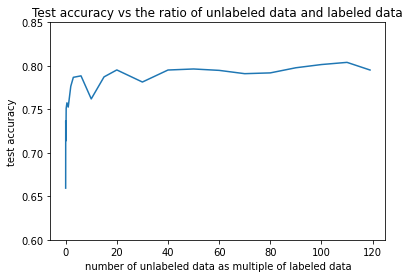

[0.6594, 0.7367, 0.7138, 0.7511, 0.7575, 0.7526, 0.7765, 0.7868, 0.7885, 0.762, 0.7873, 0.7953, 0.7814, 0.7952, 0.7964, 0.7948, 0.791, 0.7919, 0.7978, 0.8015, 0.804, 0.7952]


In [0]:
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.6, 0.85)
plt.show() 
print(acc_list)